# **04 - EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import urllib.request
from ipywidgets import interact, interactive, fixed

Here we are reading the data in, and selecting data not affected by overtime.

In [2]:
data = pd.read_csv('/data/chiragnarayanakere/dansbecker/nba-shot-logs/shot_logs.csv')
data = data.loc[(data['PERIOD'] <= 4)]
data = data.dropna()
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148


Here we are seperating shots made and shots missed into two different datasets

In [3]:
shotmade = data.loc[data['SHOT_RESULT'] == 'made']
shotmiss = data.loc[data['SHOT_RESULT'] == 'missed']

## **DOES SHOT DISTANCE AFFECT WHETHER OR NOT THE SHOT GOES IN?**

Here we are selecting the two metrics that we will be performing a cross-tabulation on, shot distance and shot result.

Text(0.5,1,'Probablity of Basket vs. Distance from Basket')

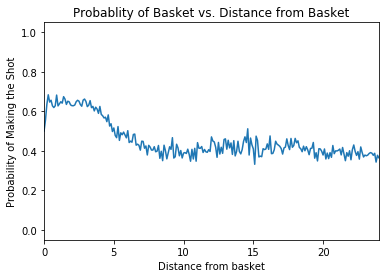

In [4]:
(pd.crosstab(data['SHOT_DIST'], data['SHOT_RESULT'], normalize='index').loc[:, 'made']).plot()
plt.xlim(0, 24)
plt.ylabel('Probability of Making the Shot')
plt.xlabel('Distance from basket')
plt.title("Probablity of Basket vs. Distance from Basket")

## **DOES THE AMOUNT OF TIME LEFT ON THE SHOT CLOCK DETERMINE WHETHER OR NOT THE SHOT GOES IN?**

Here we are selecting the two metrics that we will be performing a cross-tabulation on, shot clock and shot result.

Text(0.5,1,'Probablity of Basket vs. Shot Clock')

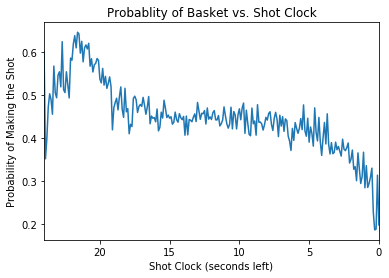

In [5]:
(pd.crosstab(data['SHOT_CLOCK'], data['SHOT_RESULT'], normalize='index').loc[:, 'made']).plot()
plt.ylabel('Probability of Making the Shot')
plt.xlabel('Shot Clock (seconds left)')
plt.xlim(24, 0)
plt.title("Probablity of Basket vs. Shot Clock")

## **WHAT IS THE DISTRIBUTION OF SHOTS BY QUARTER?**

Here we are sorting the shots made by period.

In [6]:
shotmade.groupby(['PERIOD'])['SHOT_RESULT'].count()

PERIOD
1    15055
2    13734
3    14328
4    12362
Name: SHOT_RESULT, dtype: int64

Here we are sorting the shots missed by period.

In [7]:
shotmiss.groupby(['PERIOD'])['SHOT_RESULT'].count()

PERIOD
1    17328
2    16414
3    16704
4    15579
Name: SHOT_RESULT, dtype: int64

Here we are plotting the number of makes and misses by period.

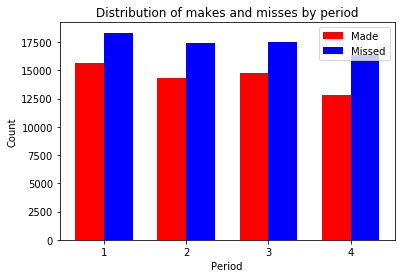

In [8]:
N = 4
made = (15640, 14278, 14725, 12817)

ind = np.arange(N)
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind, made, width, color='r')

missed = (18321, 17373, 17486, 16306)

rects2 = ax.bar(ind + width, missed, width, color='b')

# add some text for labels, title and axes ticks
ax.set_xlabel('Period')
ax.set_ylabel('Count')
ax.set_title('Distribution of makes and misses by period')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4'))

ax.legend((rects1[0], rects2[0]), ('Made', 'Missed'))


## **DOES DISTANCE FROM DEFENDER AFFECT WHETHER OR NOT THE SHOT GOES IN?**

Here we are plotting the distances from closest defender, by shots made and shots missed.

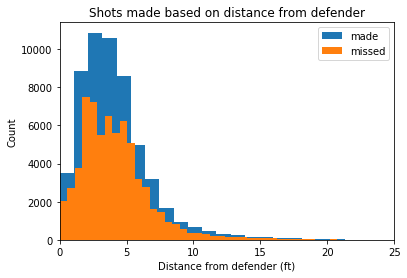

In [9]:
plt.hist(shotmade['CLOSE_DEF_DIST'], bins = 50, label = "made")
plt.hist(shotmiss['CLOSE_DEF_DIST'], bins = 50, label = "missed")
plt.xlim(0, 25)
plt.xlabel("Distance from defender (ft)")
plt.ylabel("Count")
plt.title("Shots made based on distance from defender")
plt.legend()

## **WHO HAS THE BEST FIELD GOAL PERCENTAGE?**

Here we are grouping the data by the player's name as well as a sum of how many shots taken.

In [10]:
playerssum = data.groupby(['player_name'])['FGM'].sum()

Here we are selecting the player with the highest sum of shot attempts, and graphing an image of the player.

The player who has taken the most shots is NIKOLA VUCEVIC


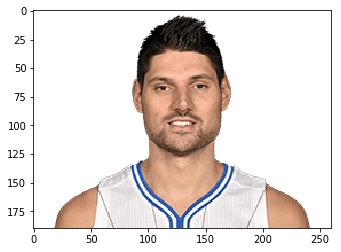

In [11]:
print("The player who has taken the most shots is " + str(playerssum.idxmax().upper()))
pic = urllib.request.urlretrieve("https://cdn.herosports.com/upload/player_image/nikola-vucevic-470.png")
vuc_pic = plt.imread(pic[0])
plt.imshow(vuc_pic)
plt.show()

Here we are grouping the data by the player's name as well as a count of how many Field Goals Made.

In [12]:
playerscount = data.groupby(['player_name'])['FGM'].count()

Here we are selecting the player with the highest count of Field Goals Made, and graphing an image of the player.

The player who has made the most shots is JAMES HARDEN


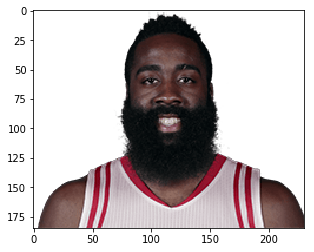

In [13]:
print("The player who has made the most shots is " + str(playerscount.idxmax().upper()))
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png")
harden_pic = plt.imread(pic[0])
plt.imshow(harden_pic)
plt.show()

Here we are grouping the data by the player's name as well as calculating their Field Goal %.

In [14]:
playersFG = playerssum/playerscount

Here we are selecting the player with the highest Field Goal %, and graphing an image of the player.

The player with the highest FG % is DEANDRE JORDAN


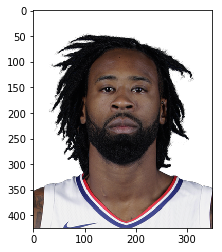

In [15]:
print("The player with the highest FG % is " + str(playersFG.idxmax().upper()))
pic1 = urllib.request.urlretrieve("https://b.fssta.com/uploads/application/nba/players/398142.vresize.350.425.medium.41.png")
dj_pic = plt.imread(pic1[0])
plt.imshow(dj_pic)
plt.show()

## **WHO IS THE BEST 3-PT SHOOTER?**

**Field goal percentage in basketball is the ratio of field goals made to field goals attempted. Its abbreviation is FG%. Although 3-point field goal percentage is often calculated separately, 3-point field goals are included in the general field goal percentage.**

Here we are creating a new dataset where the only shots are 3 pointers.

In [16]:
threeptrs = data.loc[data['PTS_TYPE'] == 3]

Here we are grouping the data by the player's name as well as a sum of how many 3-pointers taken.

In [17]:
threesum = threeptrs.groupby(['player_name'])['PTS_TYPE'].sum()

Here we are selecting the player with the highest sum of shot attempts, and graphing an image of the player.

The player who has taken the most 3-Ptrs is STEPHEN CURRY


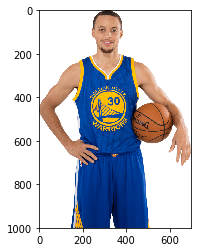

In [18]:
print("The player who has taken the most 3-Ptrs is " + str(threesum.idxmax().upper()))
pic = urllib.request.urlretrieve("http://www.stickpng.com/assets/images/584563b767f531417746b915.png")
curry_pic = plt.imread(pic[0])
plt.imshow(curry_pic)
plt.show()

Here we are grouping the data by the player's name as well as a count of how many 3-pointers made.

In [19]:
threecount = threeptrs.groupby(['player_name'])['PTS_TYPE'].count()

Here we are selecting the player with the highest count of 3-pointers made, and graphing an image of the player.

The player who has made the most 3-Ptrs is STEPHEN CURRY


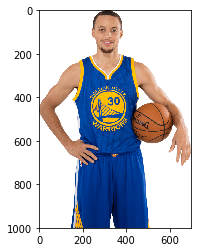

In [20]:
print("The player who has made the most 3-Ptrs is " + str(threecount.idxmax().upper()))
pic = urllib.request.urlretrieve("http://www.stickpng.com/assets/images/584563b767f531417746b915.png")
curry_pic = plt.imread(pic[0])
plt.imshow(curry_pic)
plt.show()

Here we are grouping the data by the player's name as well as calculating their 3-point %.

In [21]:
threeFG = threesum/threecount

Here we are selecting the player with the highest 3-point %, and graphing an image of the player.

The player with the highest 3-Pt % is AARON BROOKS


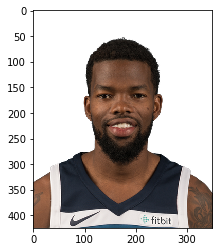

In [22]:
print("The player with the highest 3-Pt % is " + str(threeFG.idxmax().upper()))
pic = urllib.request.urlretrieve("https://b.fssta.com/uploads/application/nba/players/229726.vresize.350.425.medium.46.png")
brooks_pic = plt.imread(pic[0])
plt.imshow(brooks_pic)
plt.show()

## **WHO IS THE CLUTCHEST PLAYER?**

** "Clutchness" is calculated by how many shots a player has made in the last quarter of a game**

Here we are selecting all data in the 4th quarter.

In [23]:
clutch = data.loc[(data['PERIOD'] == 4)]

Here we are grouping the data by the player's name as well as a count of how many Field Goals Made.

In [24]:
clutchshot = clutch.groupby(['player_name'])['FGM'].count()

Here we are selecting the player with the highest count of Field Goals Made, and graphing an image of the player.

The player who is the clutchest is DAMIAN LILLARD


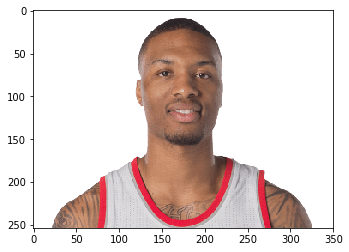

In [25]:
print("The player who is the clutchest is " + str(clutchshot.idxmax().upper()))
pic = urllib.request.urlretrieve("http://www.stickpng.com/assets/images/584566571bb5ce41bdb89076.png")
dame_dolla = plt.imread(pic[0])
plt.imshow(dame_dolla)
plt.show()

## **WHO IS THE BIGGEST BALL HOG?**

Here we are grouping the data by the player's name as well as a sum of total time handling the ball.

In [26]:
ballhog = data.groupby(['player_name'])['TOUCH_TIME'].sum()

Here we are selecting the player with the highest total time handling the ball, and graphing an image of the player.

The player who holds the ball the longest is JAMES HARDEN


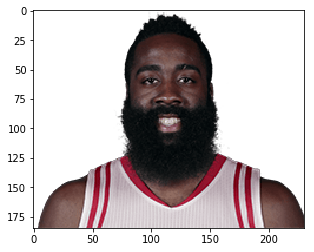

In [27]:
print("The player who holds the ball the longest is " + str(ballhog.idxmax().upper()))
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png")
harden_pic = plt.imread(pic[0])
plt.imshow(harden_pic)
plt.show()